In [3]:
import pandas as pd 

vggsound_df = pd.read_csv('/storage/slurm/zverev/datasets/vggsound/metadata/train.csv', header=None, names=['video_id', 'label', 'label_name', 'split'])
vggsound_df.head()

,video_id,label,label_name,split
0,OxPnZzn1_L8_000883.mp4,scuba diving,NaN,NaN
1,snh7E7llb48_000070.mp4,dog bow-wow,NaN,NaN
2,eNb_niqtGeU_000177.mp4,yodelling,NaN,NaN
3,xXaVc4YqBNI_000018.mp4,playing bongo,NaN,NaN
4,qTRtT9yDl3s_000319.mp4,playing double bass,NaN,NaN


In [4]:
vggsound_test_df = pd.read_csv('/storage/slurm/zverev/datasets/vggsound/metadata/test.csv', header=None, names=['video_id', 'label', 'label_name', 'split'])
vggsound_test_df.head()

,video_id,label,label_name,split
0,glLQrEijrKg_000300.mp4,playing hammond organ,NaN,NaN
1,LDoXsip0BEQ_000177.mp4,parrot talking,NaN,NaN
2,6jiO0tPLK7U_000090.mp4,basketball bounce,NaN,NaN
3,cRlp5v9BHeE_000011.mp4,car passing by,NaN,NaN
4,WgZ8KAnnTb8_000030.mp4,rapping,NaN,NaN


In [7]:
import random

labels = pd.read_csv('/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/class_labels_indices_vgg.csv')['display_name'].to_list()

for i in range(len(vggsound_test_df)):
    vggsound_test_df.loc[i, 'a'] = random.randint(0, 1)
    vggsound_test_df.loc[i, 'v'] = random.randint(0, 1)
    vggsound_test_df.loc[i, 'av'] = random.randint(0, 1)

    vggsound_test_df.loc[i, 'av_label'] = vggsound_test_df.loc[i, 'label'] if vggsound_test_df.loc[i, 'av'] else random.choice(labels)
    vggsound_test_df.loc[i, 'a_label'] = vggsound_test_df.loc[i, 'label'] if vggsound_test_df.loc[i, 'a'] else random.choice(labels)
    vggsound_test_df.loc[i, 'v_label'] = vggsound_test_df.loc[i, 'label'] if vggsound_test_df.loc[i, 'v'] else random.choice(labels)


In [8]:
vggsound_test_df[['video_id', 'label', 'a', 'a_label', 'v', 'v_label', 'av', 'av_label']].to_csv(
    './test_evaluation_result.csv',
    index=False,
)

In [21]:
t = pd.read_csv('./test_evaluation_result.csv')
t[["video_id", "a", "v", "av"]].apply(lambda x: f'{x["video_id"]} | a({x["a"]}) | v({x["v"]}) | av({x["av"]})', axis=1)

0        glLQrEijrKg_000300.mp4 | a(0.0) | v(0.0) | av(...
1        LDoXsip0BEQ_000177.mp4 | a(0.0) | v(1.0) | av(...
2        6jiO0tPLK7U_000090.mp4 | a(0.0) | v(0.0) | av(...
3        cRlp5v9BHeE_000011.mp4 | a(1.0) | v(1.0) | av(...
4        WgZ8KAnnTb8_000030.mp4 | a(0.0) | v(0.0) | av(...
                               ...                        
15441    ZPeG32vKQ3w_000030.mp4 | a(0.0) | v(1.0) | av(...
15442    yyqydavJ4YQ_000201.mp4 | a(1.0) | v(1.0) | av(...
15443    EJwOhdjhxXY_000012.mp4 | a(0.0) | v(1.0) | av(...
15444    oYEzy8gH6q8_000030.mp4 | a(1.0) | v(1.0) | av(...
15445    E75i9rHDHaE_000000.mp4 | a(1.0) | v(0.0) | av(...
Length: 15446, dtype: object

# Create video ids

In [5]:
vggsound_test_df['video_id'].map(lambda x: f'/storage/slurm/zverev/datasets/vggsound/video/{x}').to_csv(
    '/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/test_video_ids.csv',
    index=False,
    header=False
)

# Create class labels csv

In [49]:
import json

with open('/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/vgg_train_cleaned.json', 'r') as f:
    class_labels_indices = json.load(f)

In [50]:
sample_to_index_name = vggsound_df.set_index('video_id')['label'].to_dict()

In [53]:
labels_without_names = {el["labels"].split("_")[1]: f"{el['video_id']}.mp4" for el in class_labels_indices["data"]}
labels_without_names = list(sorted(labels_without_names.items(), key=lambda x: int(x[0])))
class_labels_indices_list = [
    (i, k, sample_to_index_name[v])
    for i, (k, v) in enumerate(labels_without_names)
]

with open('/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/class_labels_indices_vgg.csv', 'w') as f:
    f.write(f"index,mid,display_name\n")
    for idx, mid, display_name in class_labels_indices_list:
        f.write(f'{idx},vgg_{mid},"{display_name}"\n')


In [52]:
labels_without_names

[('0', 'ZFGu9VHfJTQ_000010.mp4'),
 ('1', 'nXPXTlVQMdY_000060.mp4'),
 ('2', '9C9ZvXCkugI_000060.mp4'),
 ('3', 'PURNt0pI8kM_000030.mp4'),
 ('4', 'Nnq9kx_ExC4_000030.mp4'),
 ('5', 'FjSljEzfVBQ_000000.mp4'),
 ('6', 'DpTPi6VrHkk_000380.mp4'),
 ('7', 'LZ6e_2UoeKs_000030.mp4'),
 ('8', 'HG34Zw-1KTQ_000020.mp4'),
 ('9', 'lu8RDB26uPY_000120.mp4'),
 ('10', 'DOxEOSckwgY_000012.mp4'),
 ('11', '6-FJjggpSoo_000210.mp4'),
 ('12', 'F0IYjZN8ojA_000100.mp4'),
 ('13', '1bwsC4U9770_000024.mp4'),
 ('14', 'DCFMA7p2pvg_000030.mp4'),
 ('15', 'a0KnoH0oea8_000030.mp4'),
 ('16', '86Yv_7OjpkU_000260.mp4'),
 ('17', 'rLKM7pVf2cw_000018.mp4'),
 ('18', '31knLkskEZ0_000030.mp4'),
 ('19', '6ne6uXzUO8Y_000030.mp4'),
 ('20', 'DQWw45SlINk_000030.mp4'),
 ('21', '3WwxA3awisw_000030.mp4'),
 ('22', 'fELy1qpCJGY_000030.mp4'),
 ('23', 'R1hxewhwPZM_000080.mp4'),
 ('24', '_VSoekFxgMA_000018.mp4'),
 ('25', 'th-llPuuT9s_000490.mp4'),
 ('26', 'XMK0_CrGBS0_000090.mp4'),
 ('27', 'gJS4RTA_jeU_000065.mp4'),
 ('28', 'Gjhu9y-rboE_000100.mp

In [12]:
import json

test_data = json.load(open('/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/vgg_test_cleaned.json', 'r'))['data']   
test_data = list(map(lambda x: f'{x["video_id"]}.jpg', test_data))
len(test_data)

15446

In [4]:
import os

frames_dir = '/storage/slurm/zverev/datasets/cav-mae/vggsound/sample_frames/frame_0'
frame_files = sorted(os.listdir(frames_dir))
len(frame_files)


183730

In [13]:
test_data[:4]

['glLQrEijrKg_000300.jpg',
 'LDoXsip0BEQ_000177.jpg',
 '6jiO0tPLK7U_000090.jpg',
 'cRlp5v9BHeE_000011.jpg']

In [5]:
frame_files[:4]

['--0PQM4-hqg_000030.jpg',
 '--56QUhyDQM_000185.jpg',
 '--5OkAjCI7g_000040.jpg',
 '--8puiAGLhs_000030.jpg']

In [16]:
len(set(test_data).difference(set(frame_files)))

15446

# Combine results

In [12]:

import torch 
import numpy as np
import src.dataloader as dataloader
import pandas as pd
import json

total_frames = 10 # change if your total frame is different

label_csv = pd.read_csv('/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/class_labels_indices_vgg.csv')
test_json = json.load(open('/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/vgg_test_cleaned.json', 'r'))["data"]

label_to_display_name = {
    int(data['labels'].split('_')[1]): label_csv.loc[int(data['labels'].split('_')[1]), "display_name"]
    for data in test_json
}

# create evaluation csv
video_ids = [data['video_id'] for data in test_json]

targets = np.load(f'egs/vggsound/exp/testmae02-vggsound-cav-mae-ft-1e-4-2-0.5-1-bs48-ldaFalse-multimodal-fzFalse-h10-a5/target_0.npy')
targets = targets.argmax(axis=1)
targets = [label_to_display_name[target] for target in targets]


modality_predictions = {}
for modality in ['audioonly', 'videoonly', 'multimodal']:
    target = np.load(f'egs/vggsound/exp/testmae02-vggsound-cav-mae-ft-1e-4-2-0.5-1-bs48-ldaFalse-{modality}-fzFalse-h10-a5/target_0.npy')
    target = target.argmax(axis=1)

    multiframe_pred = []
    for frame in range(total_frames):    
        prediction = np.load(f'egs/vggsound/exp/testmae02-vggsound-cav-mae-ft-1e-4-2-0.5-1-bs48-ldaFalse-{modality}-fzFalse-h10-a5/audio_output_{frame}.npy')
        multiframe_pred.append(prediction)
         
    multiframe_pred = np.mean(multiframe_pred, axis=0)

    multiframe_top_10 = multiframe_pred.argsort(axis=1)[:, -10:]
    multiframe_top_1 = multiframe_top_10[:, -1]

    # prepare data fo csv format
    correctly_predicted = (multiframe_top_1 == target)
    multiframe_top_10  = [
        [
            label_to_display_name[pred] if multiframe_pred[i,pred] > 1 / 309  else "" 
            for pred in row[::-1]
        ] 
        for (i, row) in enumerate(multiframe_top_10)
    ]
    
    #transpose multiframe_top_10
    multiframe_top_10 = list(map(list, zip(*multiframe_top_10)))


    # log data for the future
    modality_predictions[modality] = {
        'correctly_predicted': correctly_predicted,
        'multiframe_top_10': multiframe_top_10,
    }

eval_csv_data = list(zip(
    video_ids, targets, 
    modality_predictions['audioonly']['correctly_predicted'],
    modality_predictions['audioonly']['multiframe_top_10'][0],   
    modality_predictions['videoonly']['correctly_predicted'],
    modality_predictions['videoonly']['multiframe_top_10'][0],
    modality_predictions['multimodal']['correctly_predicted'],
    modality_predictions['multimodal']['multiframe_top_10'][0],
    # top labels
    *modality_predictions['audioonly']['multiframe_top_10'],
    *modality_predictions['videoonly']['multiframe_top_10'],
    *modality_predictions['multimodal']['multiframe_top_10'],
))

columns = ['video_id', 'label', 'a', 'a_label', 'v', 'v_label', 'av', 'av_label']
columns.extend([f'{modality}_top_{i}' for modality in ['a', 'v', 'av'] for i in range(1, 11)])

pd.DataFrame(eval_csv_data, columns=columns).to_csv(
    './test_evaluation_result.csv',
    columns=columns,
    index=False,
)

In [4]:
len(modality_predictions['audioonly']['multiframe_top_20'])

15446

In [26]:
multiframe_pred = []
for frame in range(total_frames):    
    prediction = np.load(f'egs/vggsound/exp/testmae02-vggsound-cav-mae-ft-1e-4-2-0.5-1-bs48-ldaFalse-{modality}-fzFalse-h10-a5/audio_output_{frame}.npy')
    multiframe_pred.append(prediction)
        
multiframe_pred = np.mean(multiframe_pred, axis=0)
multiframe_predd = multiframe_pred.argsort(axis=1)[:, -20:]

In [32]:
multiframe_predd[0][::-1]

array([110,  47,  33, 193, 224, 287,  80,  52, 130, 248, 109, 198,  14,
       201, 228, 242, 126, 156, 113, 223])

In [22]:
multiframe_pred[0,308]

6.2361694e-05

# Histograms

In [2]:
import torch 
import numpy as np
import src.dataloader as dataloader
import pandas as pd
import json

total_frames = 10 # change if your total frame is different

label_csv = pd.read_csv('/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/class_labels_indices_vgg.csv')
test_json = json.load(open('/storage/slurm/zverev/datasets/cav-mae/vggsound/metadata/vgg_test_cleaned.json', 'r'))["data"]

label_to_display_name = {
    int(data['labels'].split('_')[1]): label_csv.loc[int(data['labels'].split('_')[1]), "display_name"]
    for data in test_json
}

# create evaluation csv
video_ids = [data['video_id'] for data in test_json]

targets = np.load(f'egs/vggsound/exp/testmae02-vggsound-cav-mae-ft-1e-4-2-0.5-1-bs48-ldaFalse-multimodal-fzFalse-h10-a5/target_0.npy')
targets = targets.argmax(axis=1)
targets = [label_to_display_name[target] for target in targets]


modality_predictions = {}
for modality in ['audioonly', 'videoonly', 'multimodal']:
    target = np.load(f'egs/vggsound/exp/testmae02-vggsound-cav-mae-ft-1e-4-2-0.5-1-bs48-ldaFalse-{modality}-fzFalse-h10-a5/target_0.npy')
    target = target.argmax(axis=1)

    multiframe_pred = []
    for frame in range(total_frames):    
        prediction = np.load(f'egs/vggsound/exp/testmae02-vggsound-cav-mae-ft-1e-4-2-0.5-1-bs48-ldaFalse-{modality}-fzFalse-h10-a5/audio_output_{frame}.npy')
        multiframe_pred.append(prediction)
         
    multiframe_pred = np.mean(multiframe_pred, axis=0)

    multiframe_top_10 = multiframe_pred.argsort(axis=1)[:, -20:]
    multiframe_top_1 = multiframe_top_10[:, -1]

    break


In [8]:
multiframe_pred_softmax.shape

(15446, 309)

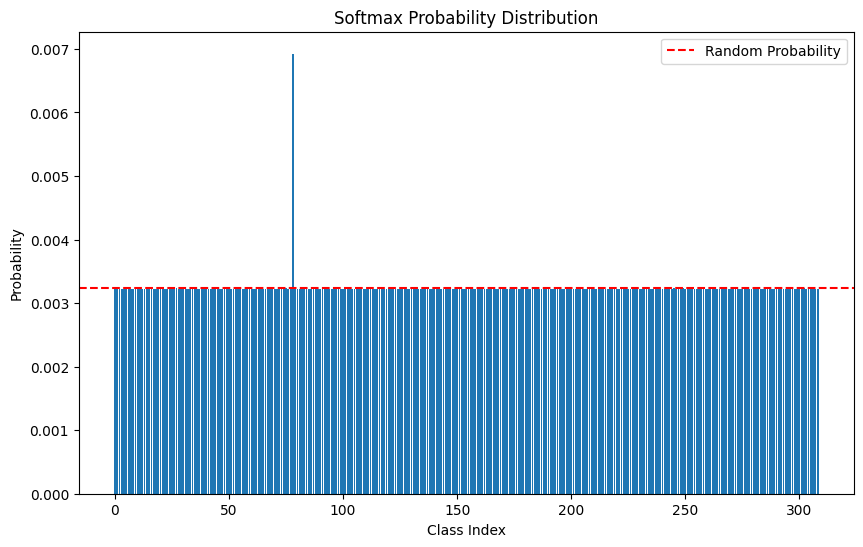

In [15]:
from scipy.special import softmax
import matplotlib.pyplot as plt

multiframe_pred_softmax = softmax(multiframe_pred, axis=1)
# multiframe_pred_softmax[multiframe_pred_softmax < 1 / 309] = 0
# Plot probability distribution for first sample
plt.figure(figsize=(10, 6))
plt.bar(range(len(multiframe_pred_softmax[10])), multiframe_pred_softmax[10])
plt.axhline(y=1/309, color='red', linestyle='--', label='Random Probability')
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.title('Softmax Probability Distribution')
plt.legend()
plt.show()

In [ ]:
df_val = pd.read_csv('./test_evaluation_result.csv')

df_val.head()